In [1]:
#Download the California data (not to your repo!) and load it into a dataframe
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

!pwd

/Users/leowang/desktop/berkeley/assignments_upstream_summer18/SUBMISSIONS/project_02


In [11]:
contrib = pd.read_csv('ks-projects-201801.csv', index_col=False)

In [16]:
contrib.columns = contrib.columns.str.replace('\.*\s+', '_').str.strip('.').str.lower()
print(contrib.shape)
contrib.head()

(378661, 15)


,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


In [146]:
contrib.describe()

,id,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,"378,661.00","378,661.00","378,661.00","378,661.00","374,864.00","378,661.00","378,661.00"
mean,"1,074,731,191.99","49,080.79","9,682.98",105.62,"7,036.73","9,058.92","45,454.40"
std,"619,086,204.32","1,183,391.26","95,636.01",907.19,"78,639.75","90,973.34","1,152,950.06"
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01
25%,"538,263,516.00","2,000.00",30.00,2.00,16.98,31.00,"2,000.00"
50%,"1,075,275,634.00","5,200.00",620.00,12.00,394.72,624.33,"5,500.00"
75%,"1,610,148,624.00","16,000.00","4,076.00",56.00,"3,034.09","4,050.00","15,500.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71"


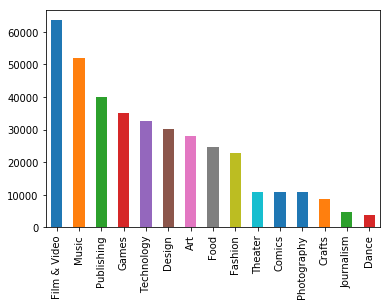

In [26]:
contrib.main_category.value_counts().plot(kind='bar')

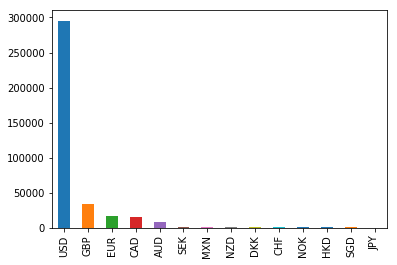

In [27]:
contrib.currency.value_counts().plot(kind='bar')

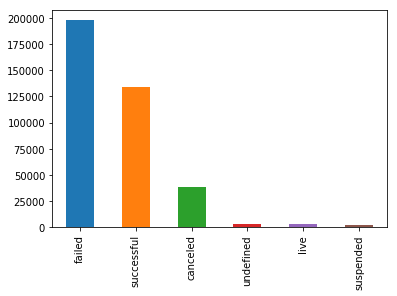

In [28]:
contrib.state.value_counts().plot(kind='bar')

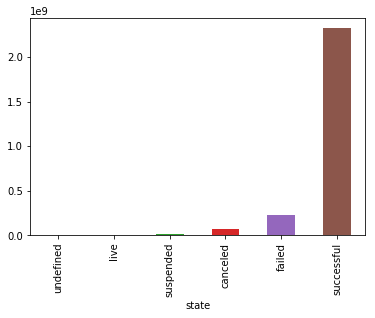

In [65]:
contrib.groupby('state').usd_pledged.sum().sort_values().plot(kind='bar')

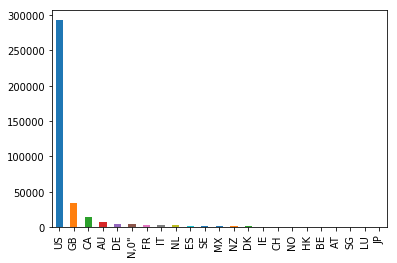

In [29]:
contrib.country.value_counts().plot(kind='bar')

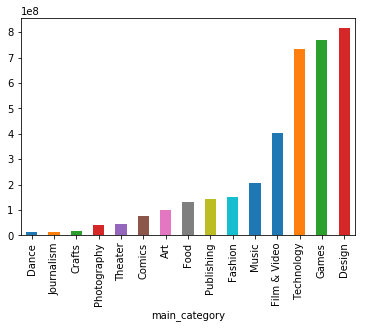

In [32]:
contrib.groupby('main_category').pledged.sum().sort_values().plot(kind='bar')

Text(0,0.5,'state')

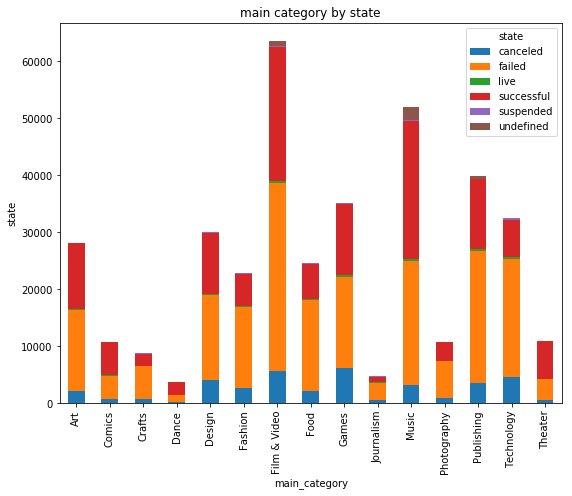

In [75]:
a = contrib.groupby(['main_category','state'])['main_category'].count().unstack('state').plot(kind='bar',stacked=True,title="main category by state",figsize=(9, 7))
a.set_ylabel('state')

In [86]:
a1 = contrib.groupby(['main_category','state'])['main_category'].count().unstack('state')
a1

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,"2,222.00","14,131.00",194.00,"11,510.00",96.00,nan
Comics,842.00,"4,036.00",76.00,"5,842.00",23.00,nan
Crafts,843.00,"5,703.00",76.00,"2,115.00",72.00,nan
Dance,163.00,"1,235.00",18.00,"2,338.00",13.00,1.00
Design,"4,152.00","14,814.00",305.00,"10,550.00",247.00,2.00
Fashion,"2,650.00","14,182.00",250.00,"5,593.00",138.00,3.00
Film & Video,"5,755.00","32,904.00",332.00,"23,623.00",117.00,854.00
Food,"2,211.00","15,969.00",184.00,"6,085.00",153.00,nan
Games,"6,202.00","16,003.00",287.00,"12,518.00",220.00,1.00


In [102]:
import numpy as np
b1 = contrib.main_category.value_counts().sort_index()
b2 = pd.DataFrame(b1,dtype=np.float)
b2

,main_category
Art,"28,153.00"
Comics,"10,819.00"
Crafts,"8,809.00"
Dance,"3,768.00"
Design,"30,070.00"
Fashion,"22,816.00"
Film & Video,"63,585.00"
Food,"24,602.00"
Games,"35,231.00"
Journalism,"4,755.00"


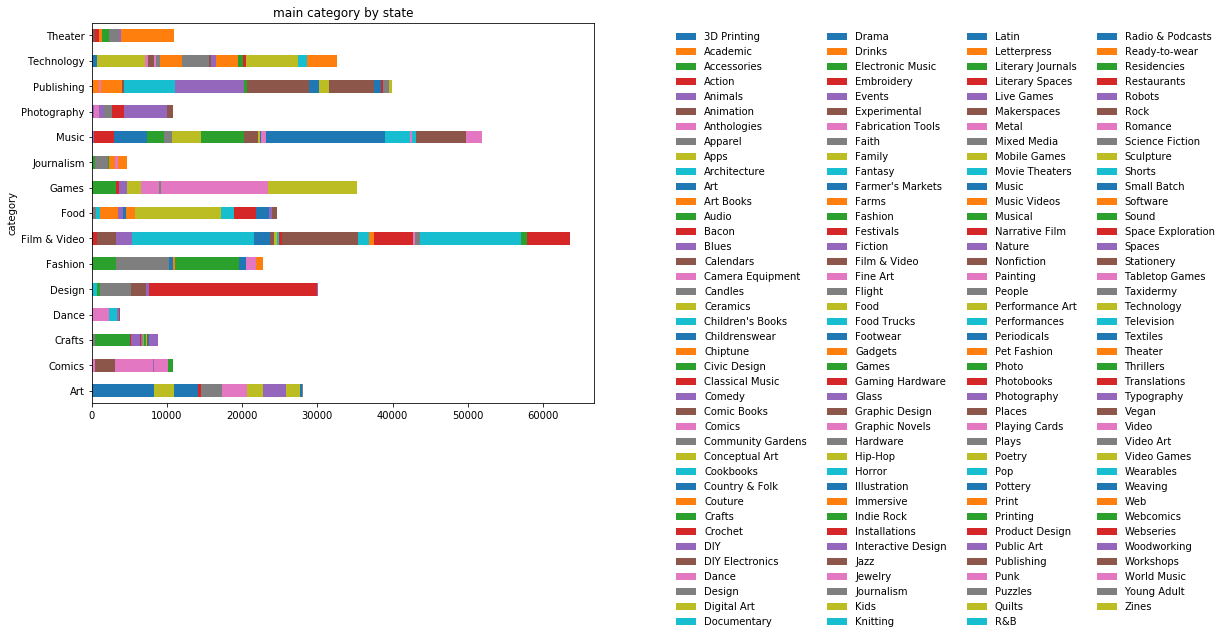

In [63]:
b = contrib.groupby(['main_category','category'])['main_category'].count().unstack('category').plot(kind='barh',stacked=True,title="main category by state",figsize=(9, 7))
b.set_ylabel('category')
b.legend(frameon=False, ncol=4,loc=9, bbox_to_anchor=(1.7, 1.0))

Text(0,0.5,'pledged')

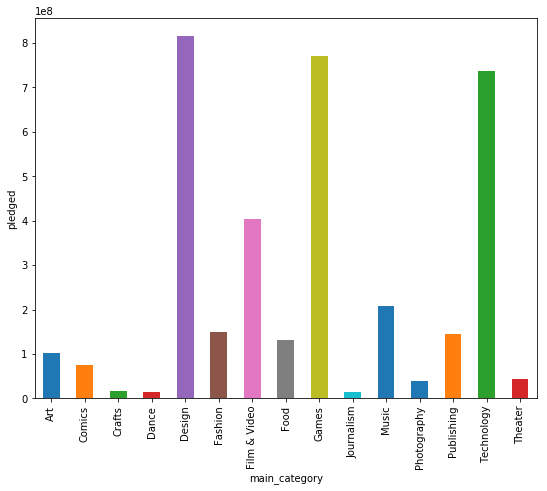

In [126]:
c = contrib.groupby('main_category').pledged.sum().plot(kind='bar',figsize=(9, 7))
c.set_ylabel('pledged')

Text(0,0.5,'pledged')

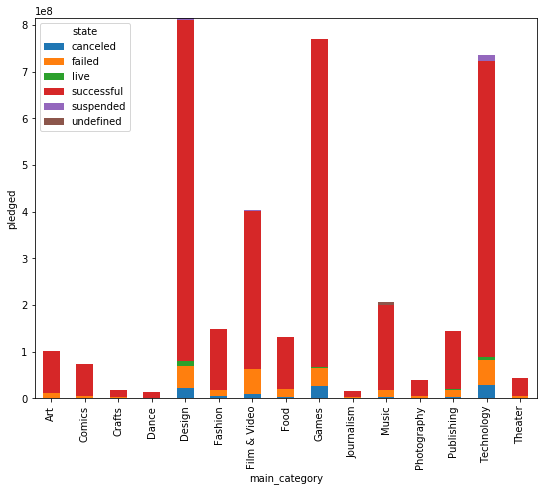

In [151]:
c = contrib[contrib.pledged > 0].groupby(['main_category','state']).pledged.sum().unstack('state').plot(kind='bar',stacked=True,figsize=(9, 7))
c.set_ylabel('pledged')
#plt.scatter(count_by_main_category.index, count_by_main_category)

Text(0,0.5,'pledged')

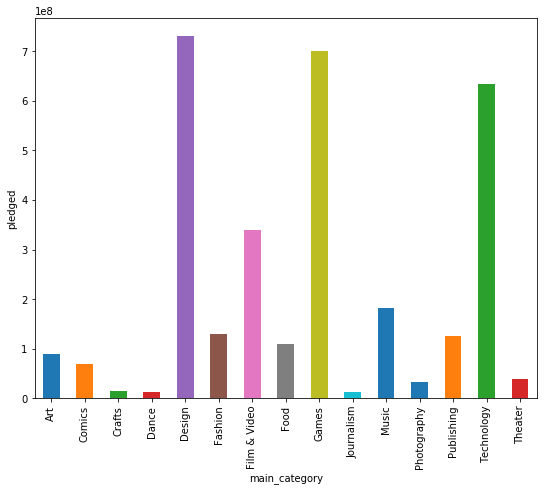

In [154]:
d = contrib[contrib.state == 'successful'].groupby(['main_category']).pledged.sum().plot(kind='bar',figsize=(9, 7))
d.set_ylabel('pledged')

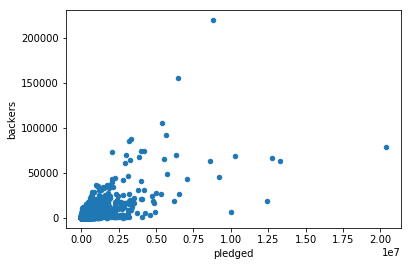

In [133]:
contrib.plot.scatter(x='pledged',y='backers')

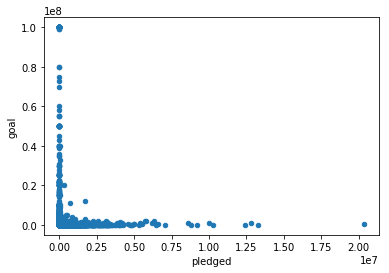

In [152]:
contrib.plot.scatter(x='pledged',y='goal')

Text(0,0.5,'pledged')

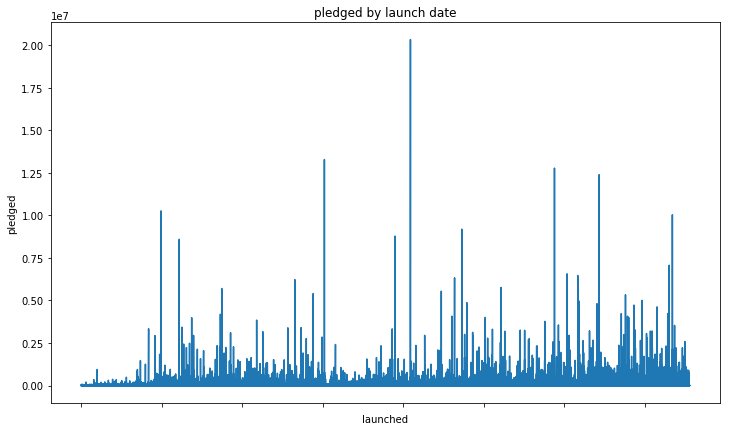

In [150]:
f=contrib.groupby('launched').pledged.sum().plot(x='launched',y='pledged', title='pledged by launch date', figsize=(12, 7))
f.set_ylabel('pledged')

ModuleNotFoundError: No module named 'wordcloud'